#### Dataset Read

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("liver_patient.csv")

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
gender = {'Female': 0,'Male': 1}   #set gender Female=0 and Male=1

In [5]:
df.Gender = [gender[i] for i in df.Gender] 

In [6]:
df.shape

(583, 11)

In [7]:
df.isnull().sum()        #check null value

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
df=df.dropna()          # drop null value

In [9]:
df.shape

(579, 11)

In [10]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

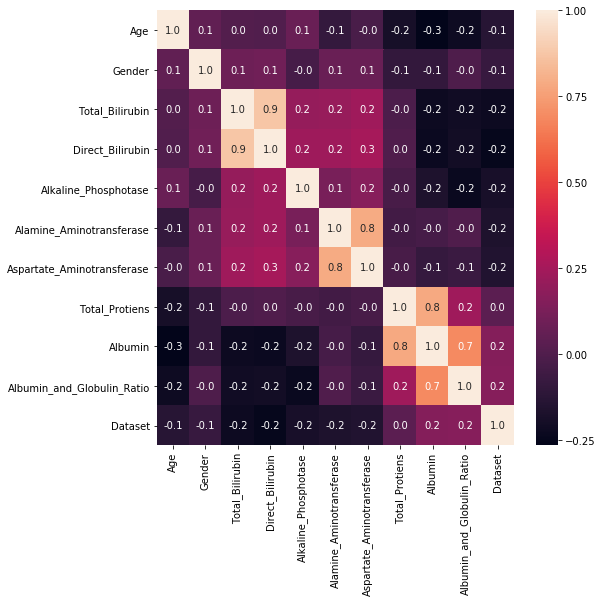

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='.1f')      #confusion matrix of dataset
plt.show()

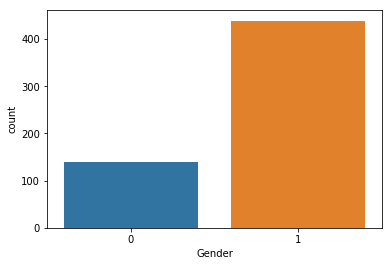

In [13]:
sns.countplot(x="Gender", data=df)
plt.show()

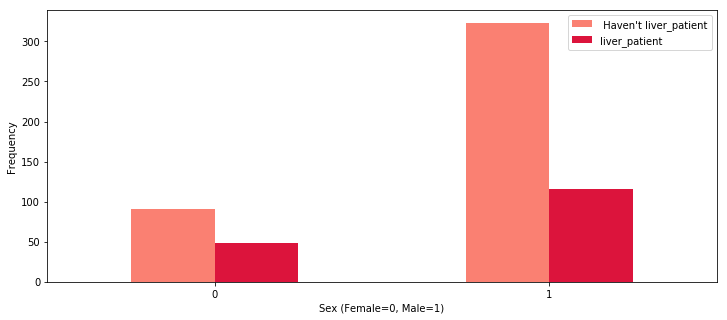

In [14]:
pd.crosstab(df.Gender,df.Dataset).plot(kind="bar",figsize=(12,5),color=['salmon','Crimson' ])
plt.xlabel('Sex (Female=0, Male=1)')
plt.xticks(rotation=0)
plt.legend([" Haven't liver_patient", "liver_patient"]) # chart for patient 
plt.ylabel('Frequency')
plt.show()

In [15]:
x = df.drop(['Dataset'], axis = 1)
y = df.Dataset.values

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

#### train test devide 

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=101)

#### Dataset preprocessing with MinMax Normalization 

In [18]:
stdc=MinMaxScaler()
x_train=stdc.fit_transform(x_train)
x_test=stdc.transform(x_test)

### Naive Bias

In [19]:
gnb = MultinomialNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print("Confusion Matrix for Gaussian Naive Bayes:")
print(confusion_matrix(y_test,predgnb))
print("Score:",round(accuracy_score(y_test,predgnb)*100,2))
print("Classification Report:",classification_report(y_test,predgnb))

Confusion Matrix for Gaussian Naive Bayes:
[[82  0]
 [34  0]]
Score: 70.69
Classification Report:              precision    recall  f1-score   support

          1       0.71      1.00      0.83        82
          2       0.00      0.00      0.00        34

avg / total       0.50      0.71      0.59       116



C:\Users\dcL\Anaconda3new\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
acc1=metrics.accuracy_score(y_test, predgnb)
print("Accuracy:",round(acc1*100),"%")

Accuracy: 71.0 %


#### SVM

In [21]:
svm = SVC(random_state=101)
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print("Confusion Matrix for Support Vector Machines:")
print(confusion_matrix(y_test,predsvm))
print("Score:",round(accuracy_score(y_test,predsvm)*100,2))
print("Classification Report:",classification_report(y_test,predsvm))

Confusion Matrix for Support Vector Machines:
[[82  0]
 [34  0]]
Score: 70.69
Classification Report:              precision    recall  f1-score   support

          1       0.71      1.00      0.83        82
          2       0.00      0.00      0.00        34

avg / total       0.50      0.71      0.59       116



C:\Users\dcL\Anaconda3new\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
acc2=metrics.accuracy_score(y_test,predsvm)
print("Accuracy:",round(acc2*100),"%")

Accuracy: 71.0 %


#### Decision Tree

In [23]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,preddt))
print("Score:",round(accuracy_score(y_test,preddt)*100,2))
print("Classification Report:",classification_report(y_test,preddt))

Confusion Matrix for Decision Tree:
[[61 21]
 [18 16]]
Score: 66.38
Classification Report:              precision    recall  f1-score   support

          1       0.77      0.74      0.76        82
          2       0.43      0.47      0.45        34

avg / total       0.67      0.66      0.67       116



In [24]:
acc3=metrics.accuracy_score(y_test,preddt)
print("Accuracy:",round(acc3*100),"%")

Accuracy: 66.0 %


#### Accuracy Comparison 

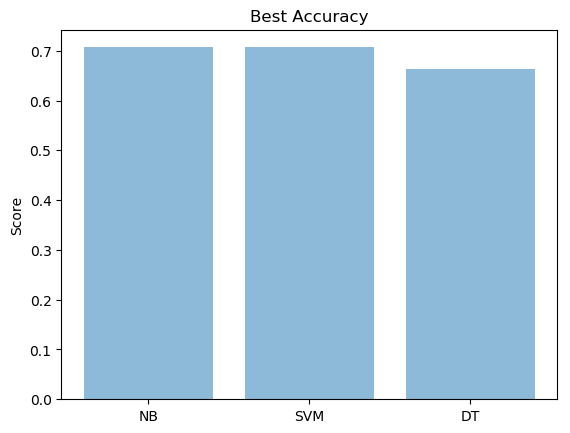

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('NB','SVM','DT')
y_pos = np.arange(len(objects))
performance = [acc1,acc2,acc3]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Best Accuracy')

plt.show()

#### test result

In [38]:
Age=int(input("Enter Age :"))
Gender=int(input("Enter Gender :"))                     
Total_Bilirubin=float(input("Enter Total_Bilirubin :"))             
Direct_Bilirubin=float(input("Enter :Direct_Bilirubin :"))            
Alkaline_Phosphotase=int(input("Enter Alkaline_Phosphotase :"))         
Alamine_Aminotransferase=int(input("Enter Alamine_Aminotransferase :"))    
Aspartate_Aminotransferase=int(input("Enter Aspartate_Aminotransferase :"))   
Total_Protiens=float(input("Enter Total_Protien :"))               
Albumin=float(input("Enter Albumin :"))             
Albumin_and_Globulin_Ratio=float(input("Albumin_and_Globulin_Ratio :")) 


Enter Age :65
Enter Gender :0
Enter Total_Bilirubin :0.7
Enter :Direct_Bilirubin :0.1
Enter Alkaline_Phosphotase :187
Enter Alamine_Aminotransferase :16
Enter Aspartate_Aminotransferase :18
Enter Total_Protien :6.8
Enter Albumin :3.3
Albumin_and_Globulin_Ratio :0.9


In [49]:
testresult1=gnb.predict([[Age,Gender ,Total_Bilirubin,Direct_Bilirubin ,Alkaline_Phosphotase,Alamine_Aminotransferase ,     
Aspartate_Aminotransferase ,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio]])

print(testresult1)

[1]


In [50]:
print("Naive Bias algorithm Prediction Result")
if testresult1==1:
    print("No Liver Disease")
else:
    print("Patient with Liver Disease")

Naive Bias algorithm Prediction Result
No Liver Disease


In [51]:
testresult2=svm.predict([[Age,Gender ,Total_Bilirubin,Direct_Bilirubin ,Alkaline_Phosphotase,Alamine_Aminotransferase ,     
Aspartate_Aminotransferase ,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio]])

print(testresult2)

[1]


In [52]:
print("Support Vector Machine algorithm Prediction Result")
if testresult2==1:
    print("No Liver_patient")
else:
    print("patient with liver disease")

Support Vector Machine algorithm Prediction Result
No Liver_patient


In [53]:
testresult3=dt.predict([[Age,Gender ,Total_Bilirubin,Direct_Bilirubin ,Alkaline_Phosphotase,Alamine_Aminotransferase ,     
Aspartate_Aminotransferase ,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio]])

print(testresult3)

[1]


In [54]:
print("Decision Tree algorithm Prediction Result")
if testresult3==1:
    print("No Liver_patient")
else:
    print("patient with liver disease")

Decision Tree algorithm Prediction Result
No Liver_patient
